# California Current System

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import os
from subprocess import check_call

from datetime import datetime
from pathlib import Path

import config
import cson_forge

## Define the grid

Specify the grid name and parameters defining its geometry and MPI domain decomposition.

2025-11-24 04:06:52 - INFO - === Creating the horizontal grid ===
2025-11-24 04:06:52 - INFO - Total time: 0.061 seconds
2025-11-24 04:06:52 - INFO - ================================================================================================
2025-11-24 04:06:52 - INFO - === Deriving the mask from coastlines ===
2025-11-24 04:06:52 - INFO - Total time: 0.167 seconds
2025-11-24 04:06:52 - INFO - ================================================================================================
2025-11-24 04:06:52 - INFO - === Generating the topography using ETOPO5 data and hmin = 5.0 meters ===
2025-11-24 04:06:52 - INFO - Reading the topography data: 0.015 seconds
2025-11-24 04:06:52 - INFO - Regridding the topography: 0.009 seconds
2025-11-24 04:06:52 - INFO - Domain-wide topography smoothing: 0.009 seconds
2025-11-24 04:06:54 - INFO - Local topography smoothing: 1.838 seconds
2025-11-24 04:06:54 - INFO - Total time: 1.875 seconds
2025-11-24 04:06:54 - INFO - ========================

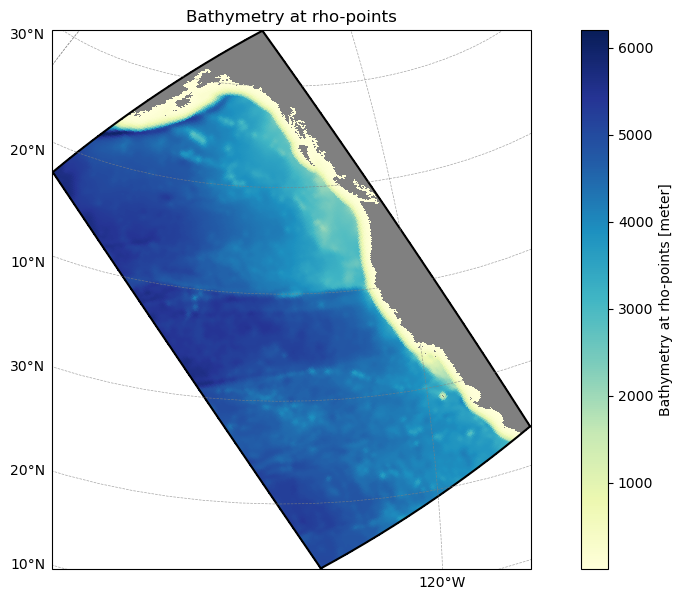

In [8]:
model_name = "roms-marbl"
grid_name = "ccs-12km"

start_time = datetime(2024, 1, 1)
end_time = datetime(2024, 1, 2)

boundaries={
        "south": True,
        "east": True,
        "north": True,
        "west": True, 
    }

np_eta = 20 # number of partitions in eta (y) 
np_xi = 16 # number of partitions in xi (x) 

grid_kwargs = dict(
    nx=224,  # number of grid points in x-direction
    ny=440,  # number of grid points in y-direction
    size_x=2688,  # domain size in x-direction (in km)
    size_y=5280,  # domain size in y-direction (in km)
    center_lon=-134.5,  # longitude of the center of the domain
    center_lat=39.6,  # latitude of the center of the domain
    rot=33.3,  # rotation of the grid (in degrees)
    N=100,  # number of vertical layers
    hc=250,
    theta_s=6.0,
    theta_b=6.0,
    verbose=True,
    hmin=5.0,
)

ocn = cson_forge.OcnModel(
    model_name=model_name,
    grid_name=grid_name,
    grid_kwargs=grid_kwargs,
    boundaries=boundaries,    
    start_time=start_time,
    end_time=end_time,
    np_eta=np_eta,
    np_xi=np_xi,
)
ocn.grid.plot()

In [9]:
ocn.prepare_source_data(clobber=False)

✔️  Using existing GLORYS_REGIONAL file for 2024-01-01: cmems_mod_glo_phy_my_0.083deg_P1D-m_REGIONAL_ccs-12km_20240101.nc
✔️  Using existing GLORYS_REGIONAL file for 2024-01-02: cmems_mod_glo_phy_my_0.083deg_P1D-m_REGIONAL_ccs-12km_20240102.nc
✔️  TPXO dataset verified at: /Users/mclong/cson-forge-data/source-data/TPXO/TPXO10.v2
✔️  Using existing BGC dataset: /Users/mclong/cson-forge-data/source-data/UNIFIED_BGC/BGCdataset.nc


In [10]:
inputs = ocn.generate_inputs(clobber=True)

2025-11-24 04:06:55 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_ccs-12km/roms_grid.nc
2025-11-24 04:06:55 - INFO - Sea surface height will NOT be used to adjust depth coordinates.


⚠️  Clobber=True: removing 8 existing .nc files in /Users/mclong/cson-forge-data/input-data/roms-marbl_ccs-12km...

▶️  [1/9] Writing ROMS grid...

▶️  [2/9] Generating initial conditions...


2025-11-24 04:07:03 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_ccs-12km/roms_initial_conditions.nc


[########################################] | 100% Completed | 65.52 s


2025-11-24 04:08:10 - INFO - No path specified for ERA5 source; defaulting to ARCO ERA5 dataset on Google Cloud.



▶️  [3/9] Generating surface forcing (physics)...


2025-11-24 04:09:21 - INFO - Data will be interpolated onto the grid coarsened by factor 2. Remember to set `interp_frc = 1` in your `bulk_frc.opt` ROMS option file.
2025-11-24 04:09:30 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_ccs-12km/roms_surface_forcing_202401.nc


[########################################] | 100% Completed | 7.24 sms


2025-11-24 04:09:41 - INFO - Data will be interpolated onto the grid coarsened by factor 2. Remember to set `interp_frc = 1` in your `bgc.opt` ROMS option file.



▶️  [4/9] Generating surface forcing (BGC)...


2025-11-24 04:09:41 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_ccs-12km/roms_surface_forcing_bgc_clim.nc


[########################################] | 100% Completed | 108.31 ms


2025-11-24 04:09:42 - INFO - Sea surface height will NOT be used to adjust depth coordinates.



▶️  [5/9] Generating boundary forcing (physics)...


2025-11-24 04:09:43 - WARNING - The northern boundary is divided by land. It would be safer (but slower and more memory-intensive) to use `apply_2d_horizontal_fill = True`.
2025-11-24 04:09:46 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_ccs-12km/roms_boundary_forcing_202401.nc


[########################################] | 100% Completed | 784.88 ms


2025-11-24 04:09:47 - INFO - Sea surface height will NOT be used to adjust depth coordinates.



▶️  [6/9] Generating boundary forcing (BGC)...


2025-11-24 04:09:51 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_ccs-12km/roms_boundary_forcing_bgc_clim.nc


[########################################] | 100% Completed | 12.56 s

▶️  [7/9] Generating tidal forcing...


2025-11-24 04:10:06 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_ccs-12km/roms_tidal_forcing.nc


[########################################] | 100% Completed | 2.91 sms

▶️  [8/9] Generating river forcing...


2025-11-24 04:10:10 - INFO - No river indices provided. Identify all rivers within the ROMS domain and assign each of them to the nearest coastal point.
2025-11-24 04:10:13 - WARNING - No records found at or after the end_time: 2024-01-02 00:00:00.
2025-11-24 04:10:13 - INFO - Compute climatology for river forcing.
2025-11-24 04:10:13 - INFO - Creating 3 synthetic river(s) to handle overlapping entries.
2025-11-24 04:10:13 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_ccs-12km/roms_rivers.nc



▶️  [9/9] Partitioning input files across tiles...

✅ All input files generated and partitioned.

📄  Wrote ROMSInputs blueprint to /Users/mclong/codes/cson-forge/workflows/blueprints/roms-marbl_ccs-12km/blueprint_roms-marbl-ccs-12km.yml


### Quick look at some forcing

[########################################] | 100% Completed | 5.45 sms


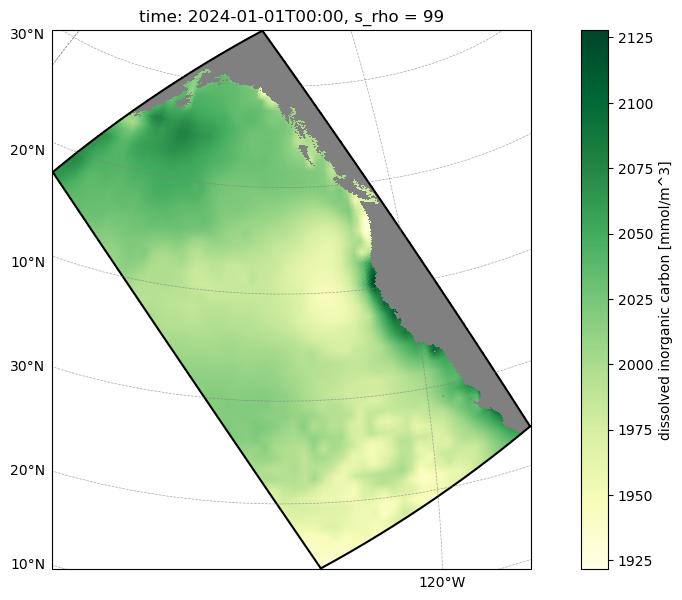

In [11]:
inputs["initial_conditions"].plot("DIC", s=-1)

[########################################] | 100% Completed | 521.53 ms


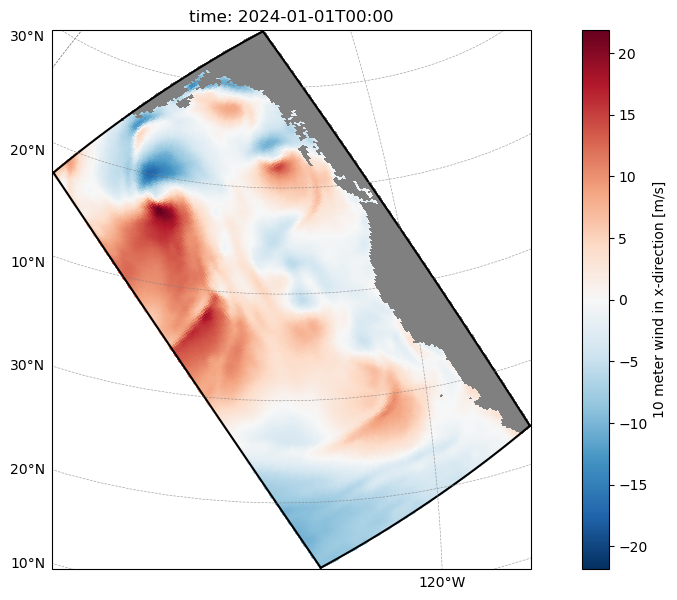

In [12]:
inputs["surface_forcing"].plot("uwnd", time=0)

## Build the model

Apply templating to source code and input files, then build the model

In [13]:
parameters = {
    "param.opt": dict(NP_XI=np_xi, NP_ETA=np_eta, NX=ocn.grid.nx, NY=ocn.grid.ny, NK=ocn.grid.N),
    "river_frc.opt": dict(nriv=inputs["rivers"].ds.sizes["nriver"]),
}

ocn.build(parameters, clean=True)

Build token: 20251124T041151Z-d11365df
Building roms-marbl for grid: ccs-12km
roms-marbl opt_base_dir : /Users/mclong/codes/cson-forge/workflows/model-configs/opt_base/opt_base_roms-marbl-cson-default
ROMS opt_dir      : /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_ccs-12km/opt
ROMS build_dir    : /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_ccs-12km/bld
Input data path   : /Users/mclong/cson-forge-data/input-data/roms-marbl_ccs-12km
ROMS_ROOT         : /Users/mclong/cson-forge-data/codes/ucla-roms
MARBL_ROOT        : /Users/mclong/cson-forge-data/codes/MARBL
Conda env         : roms_env
Logs              : /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_ccs-12km/logs
Conda env 'roms_env' already exists.
Using compiler kind: gnu
Found 4 existing build(s) in /Users/mclong/codes/cson-forge/workflows/builds.yml.
ROMS repo already present at /Users/mclong/cson-forge-data/codes/ucla-roms
MARBL repo already present at /Users/mclong/cson-forge-data/codes

PosixPath('/Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_ccs-12km/exe/roms-marbl-ccs-12km-20251124T041151Z-d11365df')

In [14]:
ocn.run(case="test.001")

Copying settings input files from /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_ccs-12km/opt to /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_ccs-12km/test.001:
  roms.in -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_ccs-12km/test.001/roms.in
  marbl_in -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_ccs-12km/test.001/marbl_in
  marbl_tracer_output_list -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_ccs-12km/test.001/marbl_tracer_output_list
Rendering master settings file: roms.in
  Rendered roms.in -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_ccs-12km/test.001/roms.in
Copying executable to run directory:
  /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_ccs-12km/exe/roms-marbl-ccs-12km-20251124T041151Z-d11365df -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_ccs-12km/test.001/roms-marbl-ccs-12km-20251124T041151Z-d11365df
Running model locally in conda env 'roms_env': mpirun -n 320 /Users/mcl